In [20]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image


PREPROCESSING DATA

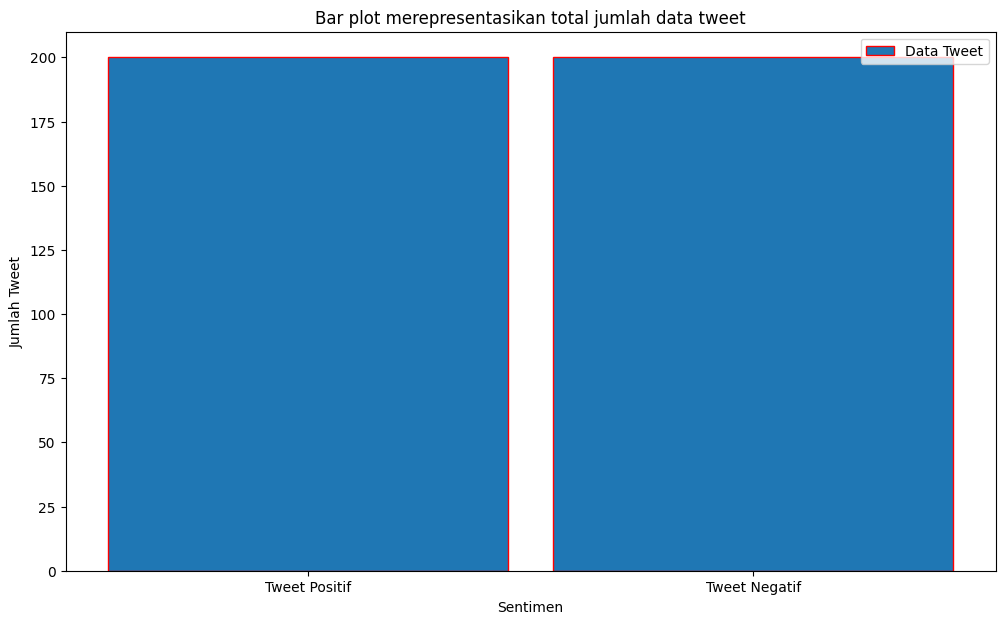

In [21]:
# Load data
df = pd.read_csv('text_preprocessing/final_dataset.csv')

# Visualisasi data
tweet_bar_df = df['Sentiment'].value_counts()

plt.figure(figsize=(12, 7))
sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor='red', width=0.9)
i = 1.0
j = 30
for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))
plt.legend(labels=['Data Tweet'])
plt.title("Bar plot merepresentasikan total jumlah data tweet")
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

# Konversi sentimen positif = 1 negatif = 0
def convert_label_sentimen(label_sentimen):
    return 1 if label_sentimen == "positive" else 0

df['label_sentimen'] = df['Sentiment'].apply(convert_label_sentimen)
df.drop(df.columns[[0]], axis=1, inplace=True)

# K-fold cross validation (splitting data)
X = df['tweet_tokens_stemmed']
y = df['label_sentimen']
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Array untuk menyimpan skor validasi silang
cv_accuracy_mnb = []
cv_precision_mnb = []
cv_recall_mnb = []

cv_accuracy_bnb = []
cv_precision_bnb = []
cv_recall_bnb = []

cv_accuracy_gnb = []
cv_precision_gnb = []
cv_recall_gnb = []

In [22]:
for train_idx, val_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

    # Vektorisasi text menggunakan TF-IDF
    tfidf_model = TfidfVectorizer(smooth_idf=False).fit(X_train)
    X_train = tfidf_model.transform(X_train)
    X_test = tfidf_model.transform(X_test)

    # Reset indeks untuk y_train
    y_train.reset_index(drop=True, inplace=True)

MULTINOMIAL NAIVE BAYES

Multinomial Naive Bayes
Cross-validation results (Accuracy): [77.77777778 83.33333333 72.22222222 75.         80.55555556 75.
 80.55555556 72.22222222 72.22222222 69.44444444]
Mean Accuracy: 75.83333333333333
[1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0]


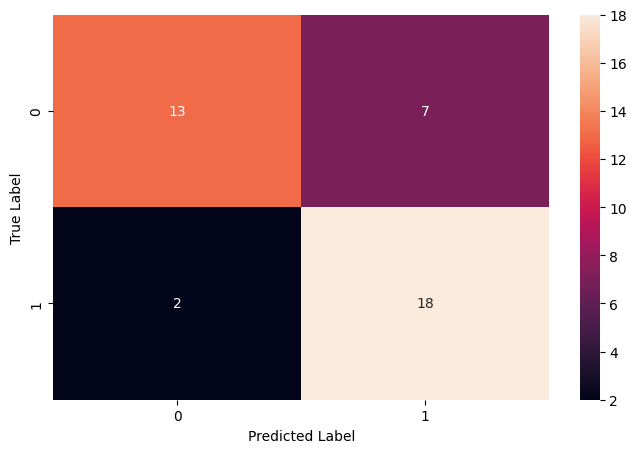

Accuracy: 77.5
Precision: 72.0
Recall: 90.0


In [23]:

    mnb = MultinomialNB()
    cv_results_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Multinomial Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_mnb * 100)
    print("Mean Accuracy:", cv_results_mnb.mean() * 100)
    mean_accuracy_mnb = cv_results_mnb.mean()

    mnb.fit(X_train, y_train)
    predict = mnb.predict(X_test)
    print(predict)

    # Confusion matrix model
    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Skor akurasi model
    accuracy_mnb = accuracy_score(y_test, predict)
    print('Accuracy:', accuracy_mnb * 100)
    cv_accuracy_mnb.append(accuracy_mnb)

    # Precision
    precision_mnb = precision_score(y_test, predict)
    print('Precision:', precision_mnb * 100)
    cv_precision_mnb.append(precision_mnb)

    # Recall
    recall_mnb = recall_score(y_test, predict)
    print('Recall:', recall_mnb * 100)
    cv_recall_mnb.append(recall_mnb)

BERNOULLI NAIVE BAYES

Bernoulli Naive Bayes
Cross-validation results (Accuracy): [77.77777778 77.77777778 66.66666667 72.22222222 77.77777778 75.
 80.55555556 72.22222222 69.44444444 77.77777778]
Mean Accuracy: 74.72222222222223


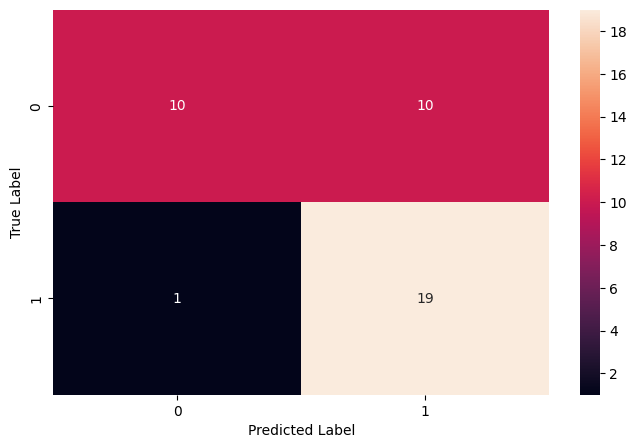

Accuracy: 72.5
Precision: 65.51724137931035
Recall: 95.0


In [24]:

    bnb = BernoulliNB()
    cv_results_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Bernoulli Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_bnb * 100)
    print("Mean Accuracy:", cv_results_bnb.mean() * 100)

    bnb.fit(X_train, y_train)
    predict_bnb = bnb.predict(X_test)

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_bnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_bnb = accuracy_score(y_test, predict_bnb)
    print('Accuracy:', accuracy_bnb * 100)
    cv_accuracy_bnb.append(accuracy_bnb)

    precision_bnb = precision_score(y_test, predict_bnb)
    print('Precision:', precision_bnb * 100)
    cv_precision_bnb.append(precision_bnb)

    recall_bnb = recall_score(y_test, predict_bnb)
    print('Recall:', recall_bnb * 100)
    cv_recall_bnb.append(recall_bnb)

GAUSSIAN NAIVE BAYES

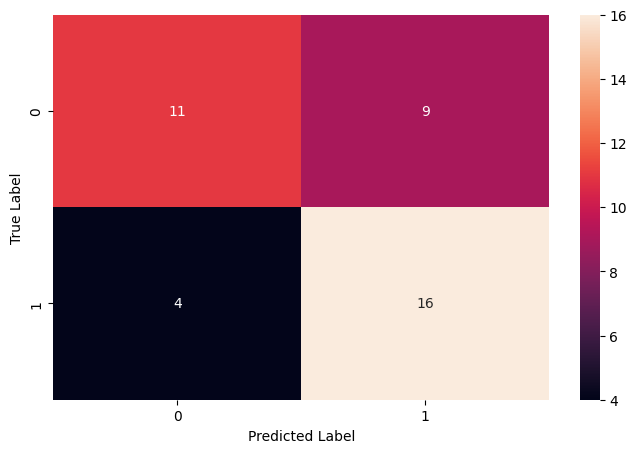

Accuracy: 67.5
Precision: 64.0
Recall: 80.0


In [25]:

    gnb = GaussianNB()
    gnb.fit(X_train.toarray(), y_train)
    predict_gnb = gnb.predict(X_test.toarray())

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_gnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_gnb = accuracy_score(y_test, predict_gnb)
    print('Accuracy:', accuracy_gnb * 100)
    cv_accuracy_gnb.append(accuracy_gnb)

    precision_gnb = precision_score(y_test, predict_gnb)
    print('Precision:', precision_gnb * 100)
    cv_precision_gnb.append(precision_gnb)

    recall_gnb = recall_score(y_test, predict_gnb)
    print('Recall:', recall_gnb * 100)
    cv_recall_gnb.append(recall_gnb)

HASIL EVALUASI

In [26]:
results_data = {
    'Model': ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB'],
    'Mean Accuracy': [np.mean(cv_accuracy_mnb), np.mean(cv_accuracy_bnb), np.mean(cv_accuracy_gnb)],
    'Mean Precision': [np.mean(cv_precision_mnb), np.mean(cv_precision_bnb), np.mean(cv_precision_gnb)],
    'Mean Recall': [np.mean(cv_recall_mnb), np.mean(cv_recall_bnb), np.mean(cv_recall_gnb)]
}

results_df = pd.DataFrame(results_data)

# Menampilkan hasil dalam satu tabel
print(results_df)

            Model  Mean Accuracy  Mean Precision  Mean Recall
0  Multinomial NB          0.775        0.720000         0.90
1    Bernoulli NB          0.725        0.655172         0.95
2     Gaussian NB          0.675        0.640000         0.80


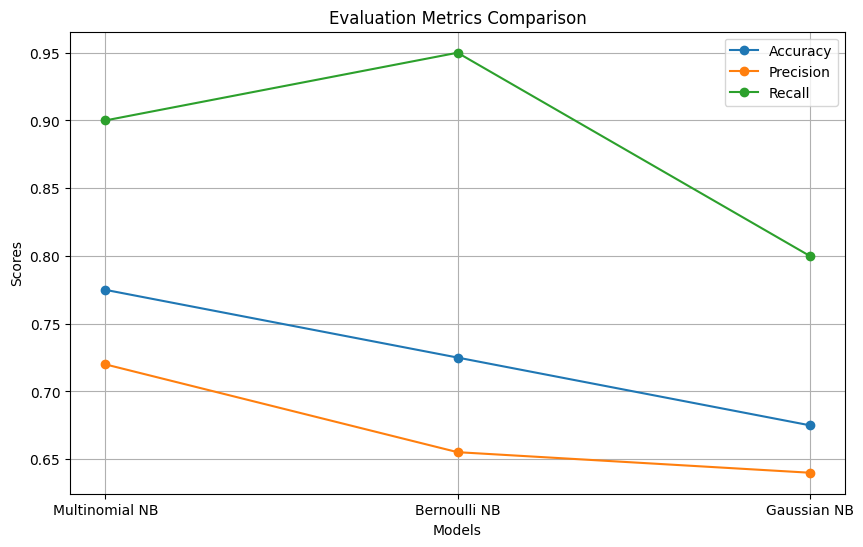

In [27]:
# Visualisasi hasil evaluasi
models = ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB']
accuracy_scores = [np.mean(cv_accuracy_mnb), np.mean(cv_accuracy_bnb), np.mean(cv_accuracy_gnb)]
precision_scores = [np.mean(cv_precision_mnb), np.mean(cv_precision_bnb), np.mean(cv_precision_gnb)]
recall_scores = [np.mean(cv_recall_mnb), np.mean(cv_recall_bnb), np.mean(cv_recall_gnb)]

plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', label='Accuracy')
plt.plot(models, precision_scores, marker='o', label='Precision')
plt.plot(models, recall_scores, marker='o', label='Recall')

plt.title('Evaluation Metrics Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


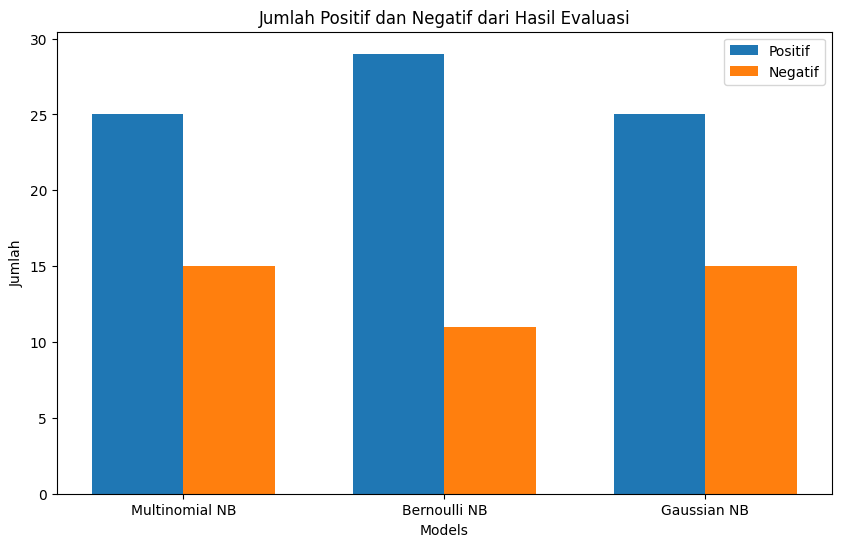

In [29]:
# Menghitung jumlah positif dan negatif dari prediksi
positif_counts = [np.sum(predict == 1) for predict in [predict, predict_bnb, predict_gnb]]
negatif_counts = [np.sum(predict == 0) for predict in [predict, predict_bnb, predict_gnb]]

# Visualisasi jumlah positif dan negatif
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, positif_counts, bar_width, label='Positif')
plt.bar(index + bar_width, negatif_counts, bar_width, label='Negatif')

plt.xlabel('Models')
plt.ylabel('Jumlah')
plt.title('Jumlah Positif dan Negatif dari Hasil Evaluasi')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.show()
